<a href="https://colab.research.google.com/github/sundarp17/Data-science/blob/main/Statistics/correlation_for_non_linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Non - parametric methods using pandas and scipy **

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sb
from pylab import rcParams

import scipy
from scipy.stats import spearmanr

In [3]:
'''rcparams is used for setting the size of visualization. 14,7 is length,height'''
rcParams['figure.figsize']=14,7
plt.style.use('seaborn-whitegrid')

**Using Spearmans rank correlation**

In [5]:
cars =pd.read_csv(r'/content/mtcars.csv')
cars.columns=['car_names','mpg','cyl','disp','hp','drat','wt','qsec','vs','am','gear','carb']
cars.head()

,car_names,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


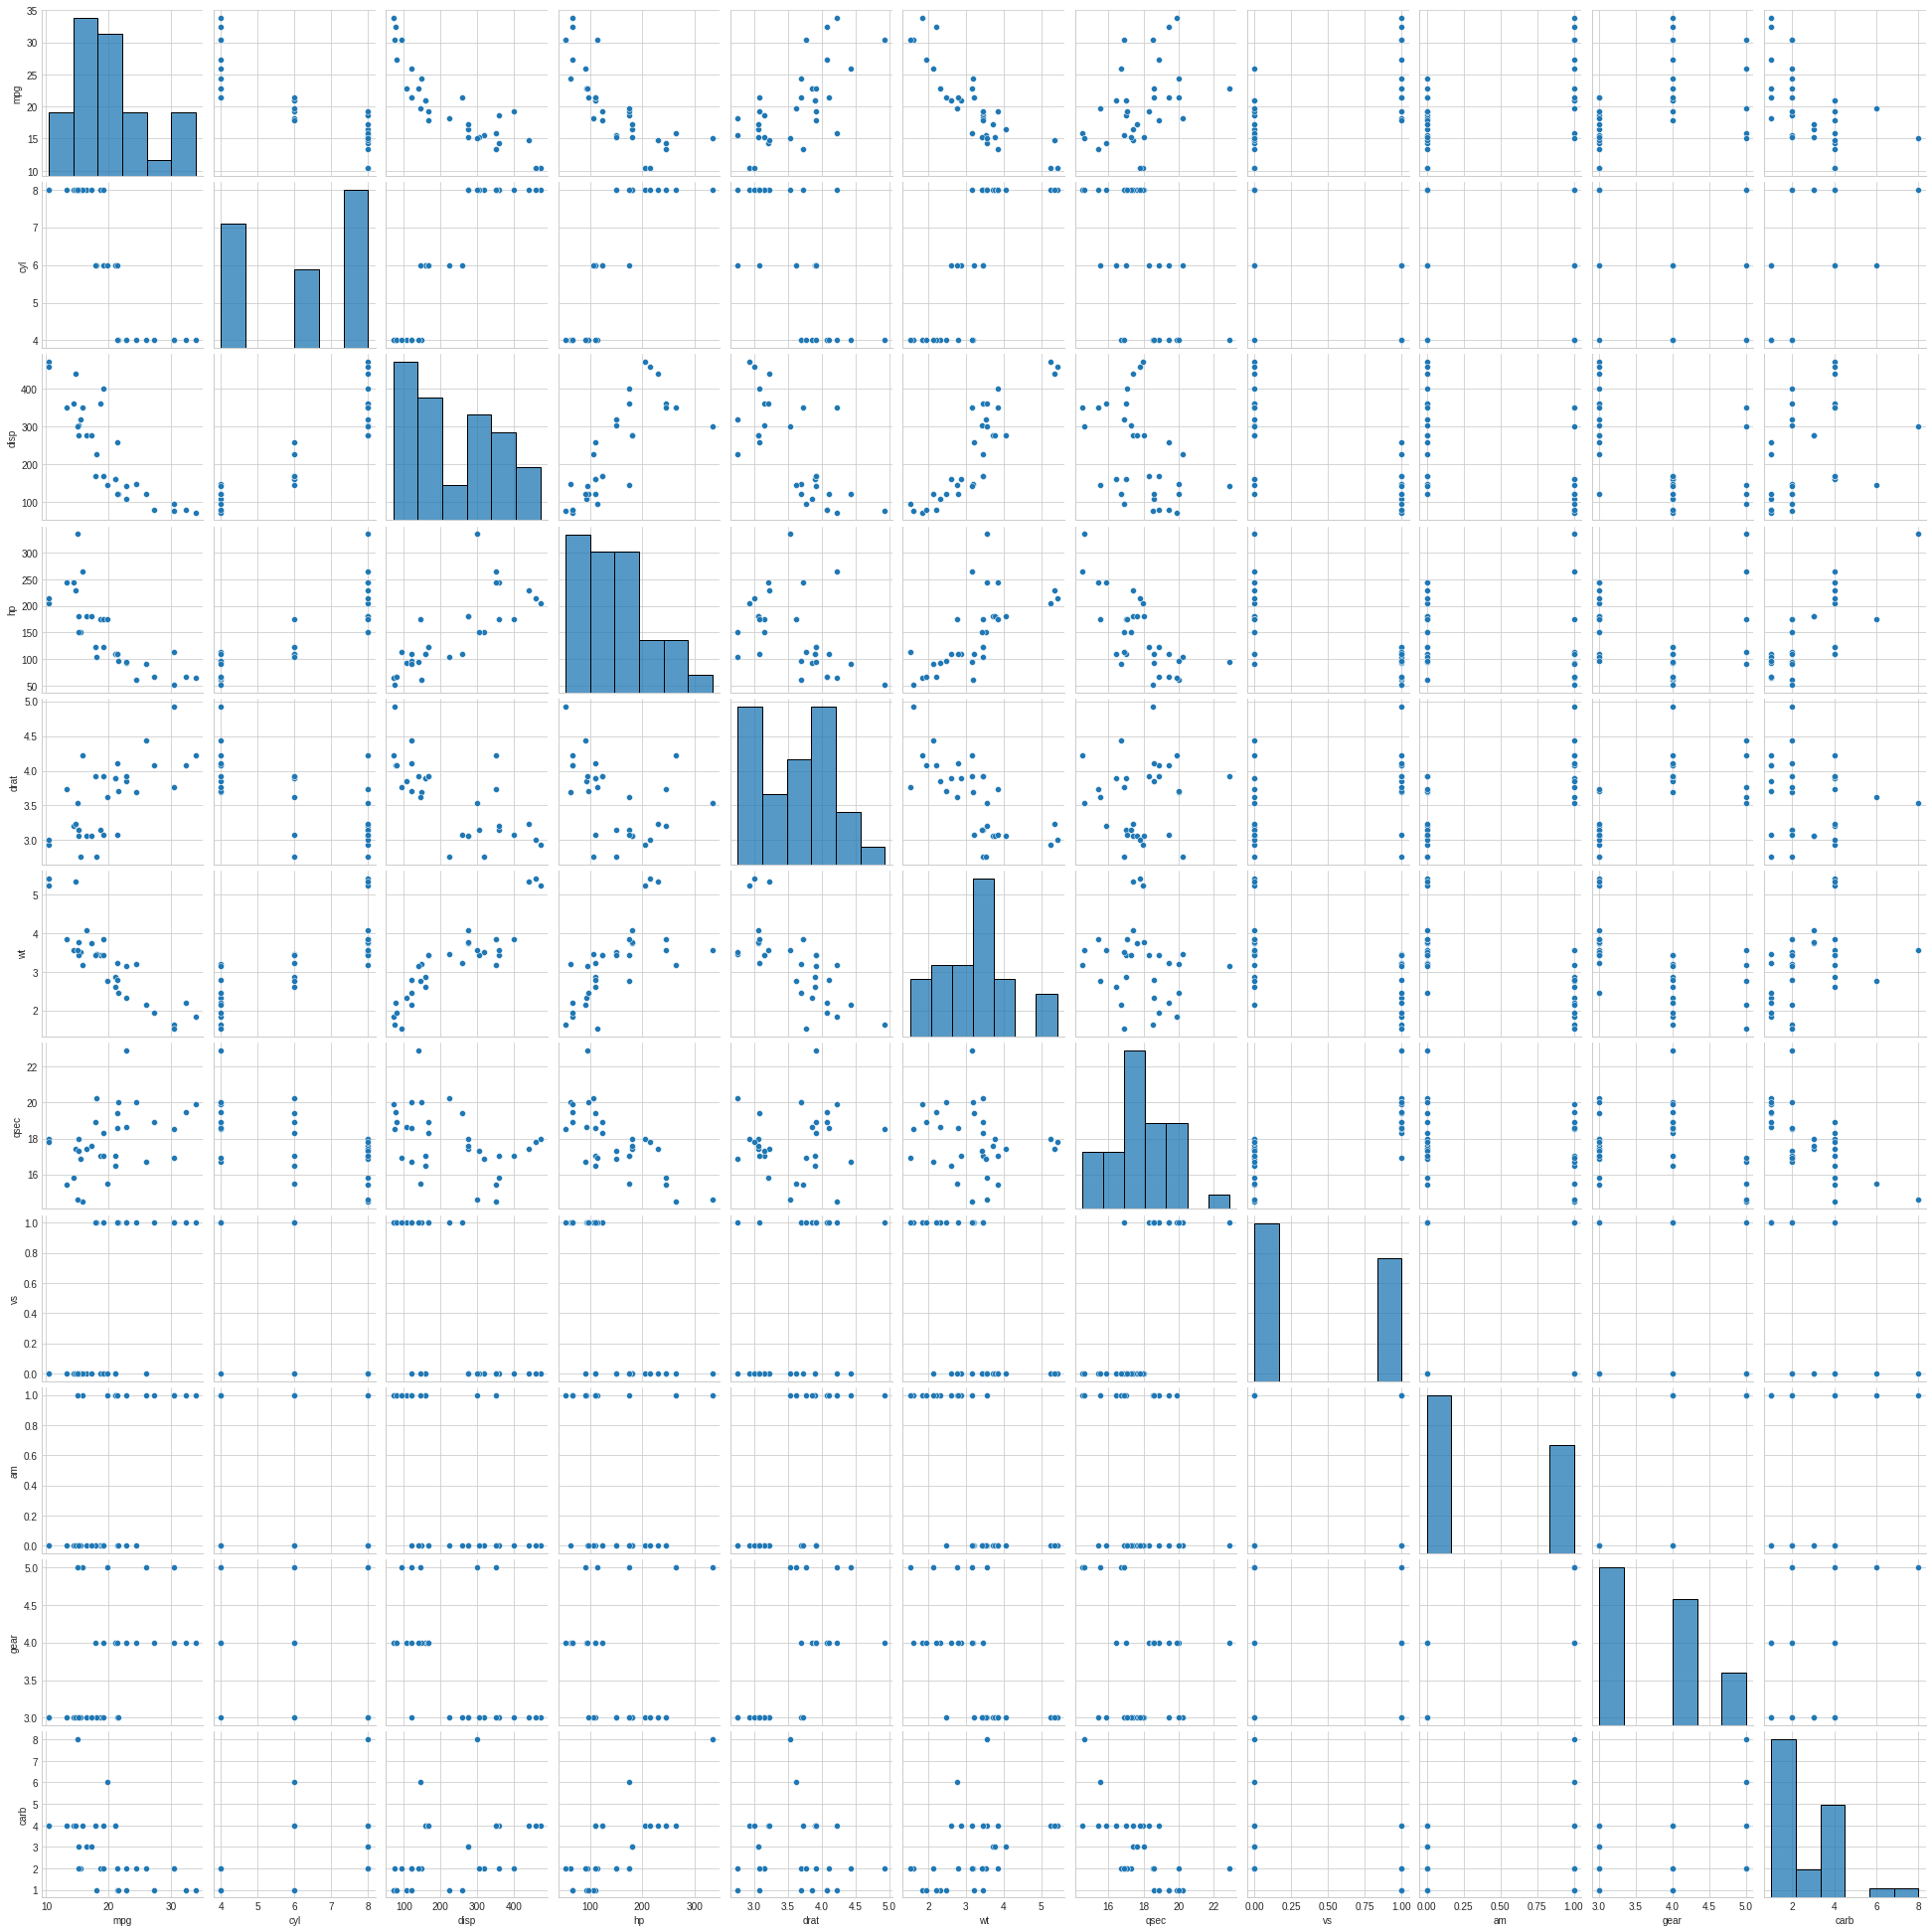

In [6]:
sb.pairplot(cars)

As there are lot of variables, I took only some for better understanding.(only ordinal variables)

In [7]:
X = cars[['cyl','vs','am','gear']]
X.head()

,cyl,vs,am,gear
0,6,0,1,4
1,6,0,1,4
2,4,1,1,4
3,6,1,0,3
4,8,0,0,3


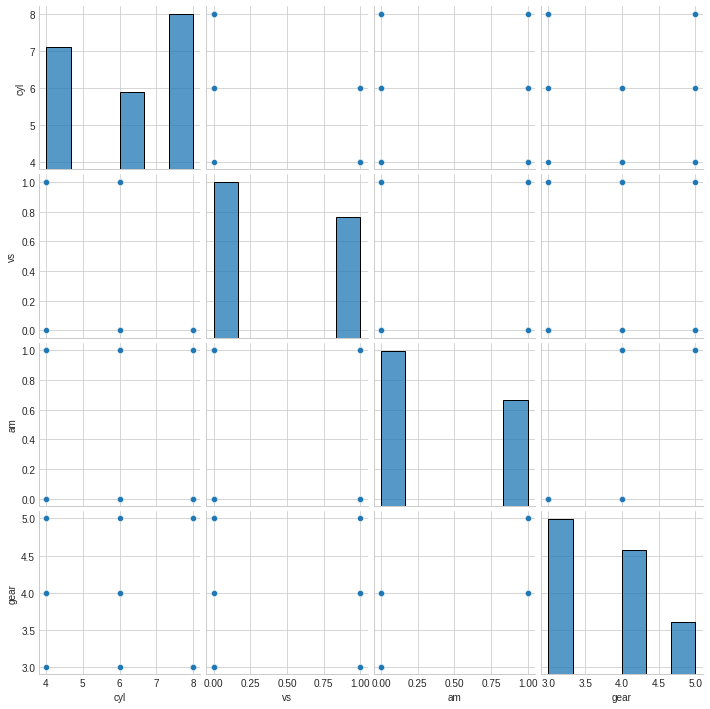

In [8]:
sb.pairplot(X)

In [9]:
cyl = cars['cyl']
vs = cars['vs']
am =cars['am']
gear = cars['gear']

spearmanr_coeff, p_value = spearmanr(cyl,vs)
print('Spearman rank correlation coeff %0.3f'%(spearmanr_coeff))

Spearman rank correlation coeff -0.814


In [10]:
spearmanr_coeff, p_value = spearmanr(cyl,am)
print('Spearman rank correlation coeff %0.3f'%(spearmanr_coeff))

Spearman rank correlation coeff -0.522


In [11]:
spearmanr_coeff, p_value = spearmanr(cyl,gear)
print('Spearman rank correlation coeff %0.3f'%(spearmanr_coeff))

Spearman rank correlation coeff -0.564


cyl, vs has strong correlation.

**Chi-square test for independence**

In [12]:
table = pd.crosstab(cyl,am)

from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(table.values)
print('Chi-Square statistic %0.3f p_value %0.3f'%(chi2,p))

Chi-Square statistic 8.741 p_value 0.013


In [13]:
table = pd.crosstab(cyl,vs)
chi2, p, dof, expected = chi2_contingency(table.values)
print('Chi-Square statistic %0.3f p_value %0.3f'%(chi2,p))

Chi-Square statistic 21.340 p_value 0.000


In [14]:
table = pd.crosstab(cyl,gear)
chi2, p, dof, expected = chi2_contingency(table.values)
print('Chi-Square statistic %0.3f p_value %0.3f'%(chi2,p))

Chi-Square statistic 18.036 p_value 0.001
